In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression as OLS
from sklearn.metrics import mean_squared_error as mse

pd.__version__

'2.2.3'

# Часть 3 - Моделирование данных

## Содержание

### 9 Моделирование данных - предварительная обработка
- Введение в моделирование данных
- Изучение зависимых и независимых переменных
- Понимание масштабирования и нормализации данных
- Задание 9.1 - Разбиение, масштабирование и моделирование данных
- Резюме

### 10 Моделирование данных - основы моделирования
- Введение в моделирование данных
- Изучение основ моделирования
- Прогнозирование будущих значений временных рядов
- Задание 10.1 - Нормализация и сглаживание данных
- Резюме

### 11 Моделирование данных - Регрессионное моделирование
- Введение в регрессионное моделирование
- Изучение регрессионного моделирования
- Диагностика модели
- Задание 11.1 - Множественная регрессия с нелинейными моделями
- Резюме

## 9 Моделирование данных - предварительная обработка

### Введение в моделирование данных

In [2]:
df = pd.read_csv('../../data/part3/chapter9/metal_alloy.csv')
df

metal_1   metal_2  alloy_hardness
0     0.958000  0.140659        1.254157
1     0.920147  0.107089        0.956846
2     0.590646  0.483316        1.952517
3     0.787427  0.239446        1.636522
4     0.223974  0.817454        2.367797
...        ...       ...             ...
2853  0.548989  0.536676        1.964153
2854  0.506765  0.520222        2.121921
2855  0.519789  0.553591        1.802263
2856  0.499100  0.539305        1.687534
2857  0.501077  0.579566        1.932144

[2858 rows x 3 columns]

In [3]:
df.describe()

metal_1      metal_2  alloy_hardness
count  2858.000000  2858.000000     2858.000000
mean      0.571507     0.511146        1.863682
std       0.092015     0.094267        0.315855
min       0.148309     0.097655        0.558923
25%       0.520719     0.461251        1.661194
50%       0.568061     0.513548        1.864663
75%       0.618368     0.565723        2.076587
max       1.021651     0.922628        3.363747

<Axes: >

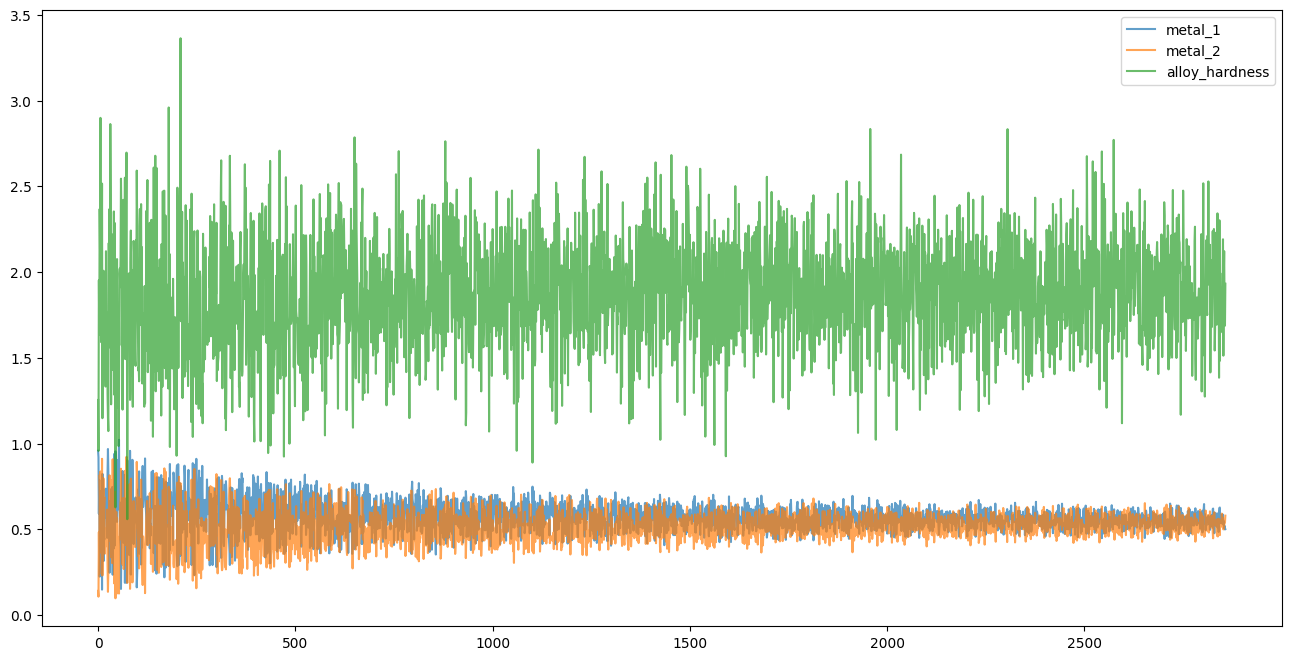

In [4]:
df.plot(figsize=(16, 8), alpha=0.7)

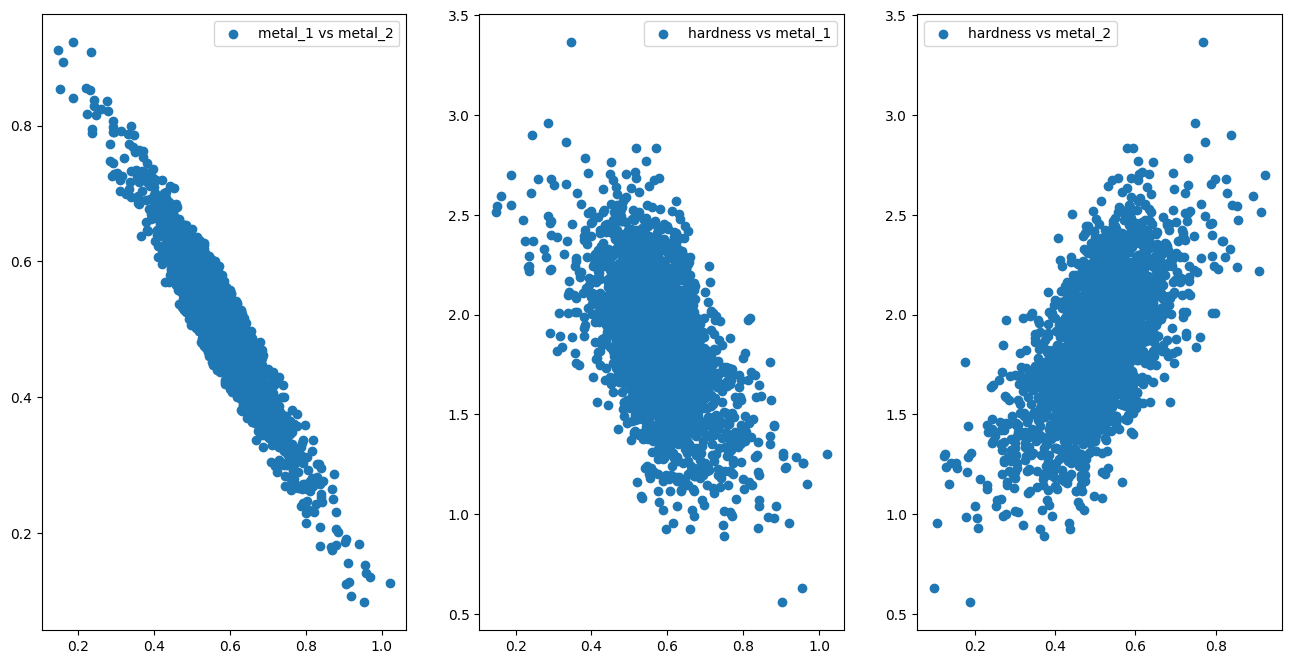

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(16, 8))

axes[0].scatter(
    df['metal_1'],
    df['metal_2'],
    label = 'metal_1 vs metal_2',
)
axes[0].legend()

axes[1].scatter(
    df['metal_1'],
    df['alloy_hardness'],
    label = 'hardness vs metal_1',
)
axes[1].legend()

axes[2].scatter(
    df['metal_2'],
    df['alloy_hardness'],
    label = 'hardness vs metal_2',
)
axes[2].legend()

plt.show()

In [6]:
correlation = df['metal_1'].corr(df['metal_2'])
correlation

np.float64(-0.9335045017430931)

#### Статистическая модель

In [7]:
import statsmodels.api as sm

X = sm.add_constant(df.loc[:, ['metal_1', 'metal_2']])
lin_model = sm.OLS(df['alloy_hardness'], X)
my_model = lin_model.fit()

print(my_model.summary())
print(my_model.params)

                            OLS Regression Results                            
Dep. Variable:         alloy_hardness   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     929.6
Date:                Fri, 31 Jan 2025   Prob (F-statistic):          1.23e-311
Time:                        11:54:37   Log-Likelihood:                -44.409
No. Observations:                2858   AIC:                             94.82
Df Residuals:                    2855   BIC:                             112.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3434      0.147     -2.339      0.0

y = -0.3434 + 1.1086 * metal_1 + 3.0783 * metal_2

In [8]:
metal_1 = 0.4
metal_2 = 0.8

In [9]:
y = -0.3434 + 1.1086 * metal_1 + 3.0783 * metal_2
y

2.5626800000000003

#### Генерация случайных данных

In [10]:
np.random.seed(55)

multi_coll_data = pd.DataFrame({'x1': range(1000)})

for i in range(9):
    multi_coll_data['x' + str(i + 2)] = np.add(list(range(1000)), np.random.uniform(-50, 50, 1000))
    

for i in range(0, 9, 2):
    multi_coll_data['x' + str(i + 2)] = np.add(multi_coll_data['x' + str(i + 2)], 10 * np.random.uniform(-100, 100, 1000))
    

np.random.normal(-100, 100, 1000)
multi_coll_data['y'] = range(1000)

In [11]:
multi_coll_data

x1           x2           x3           x4           x5           x6  \
0      0  -579.086269   -21.352788  -127.136661   -44.242123   -82.658981   
1      1   352.288310    42.355440   975.854620   -40.891040  -333.674322   
2      2   460.677297     0.467680  -691.299930   -35.042297   293.510696   
3      3  -746.577859   -40.318827   357.783231   -19.421430   704.798484   
4      4  -692.088919    17.724324  -953.864448    22.520236  -707.770416   
..   ...          ...          ...          ...          ...          ...   
995  995  1861.276790  1013.560643  1087.982225  1023.738733   980.756591   
996  996  1387.077341  1019.701253  1332.705610  1027.438780  1941.506839   
997  997  1171.140963   991.916710  1357.697060  1046.720219  1828.655199   
998  998   214.549942   995.550479  1603.694783  1000.771433   316.011067   
999  999  1978.357550  1003.635314   820.058029  1014.120490   888.791464   

              x7           x8           x9          x10    y  
0      23.043307   390.611985    32.379823   855.245946    0  
1      -0.717224  -201.265706   -12.522834  -494.399577    1  
2      28.223616   516.710800    50.632223  -638.390063    2  
3      30.728551    -3.113581   -46.230721  -741.969272    3  
4       1.901699   469.345834     0.762547   807.144628    4  
..           ...          ...          ...          ...  ...  
995   949.343224   760.496127   945.706977  1281.693691  995  
996   989.956534    23.911601   982.981131  1064.590884  996  
997   949.730361   284.580213   985.958475  1691.377234  997  
998  1003.760028  1196.998620  1047.695951   173.344662  998  
999  1039.565397  1117.055024   959.593362   347.742630  999  

[1000 rows x 11 columns]

In [12]:
multi_coll_data.describe()

x1           x2           x3           x4           x5  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean    499.500000   488.511416   501.155173   528.081494   498.461929   
std     288.819436   652.089943   290.159283   638.220208   289.768393   
min       0.000000  -930.320259   -40.318827 -1006.390645   -44.242123   
25%     249.750000   -12.600960   253.698322    41.185114   254.758918   
50%     499.500000   481.873691   496.696353   545.518091   502.306019   
75%     749.250000   991.083324   757.958709   991.522760   752.583341   
max     999.000000  1978.357550  1021.453170  1986.100582  1046.720219   

                x6           x7           x8           x9          x10  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean    514.890713   498.892323   461.384521   499.442777   506.567117   
std     653.657528   289.952784   643.473473   290.528559   657.127397   
min    -970.074483   -43.303588  -888.712598   -46.230721  -959.722293   
25%      12.409287   250.807414   -31.118217   246.944195    -2.936601   
50%     534.582109   506.972797   455.911348   499.169859   508.460055   
75%    1027.528486   746.531261   962.945517   746.464865  1028.102798   
max    1941.506839  1039.565397  1984.087235  1047.695951  1980.877205   

                 y  
count  1000.000000  
mean    499.500000  
std     288.819436  
min       0.000000  
25%     249.750000  
50%     499.500000  
75%     749.250000  
max     999.000000

<Axes: >

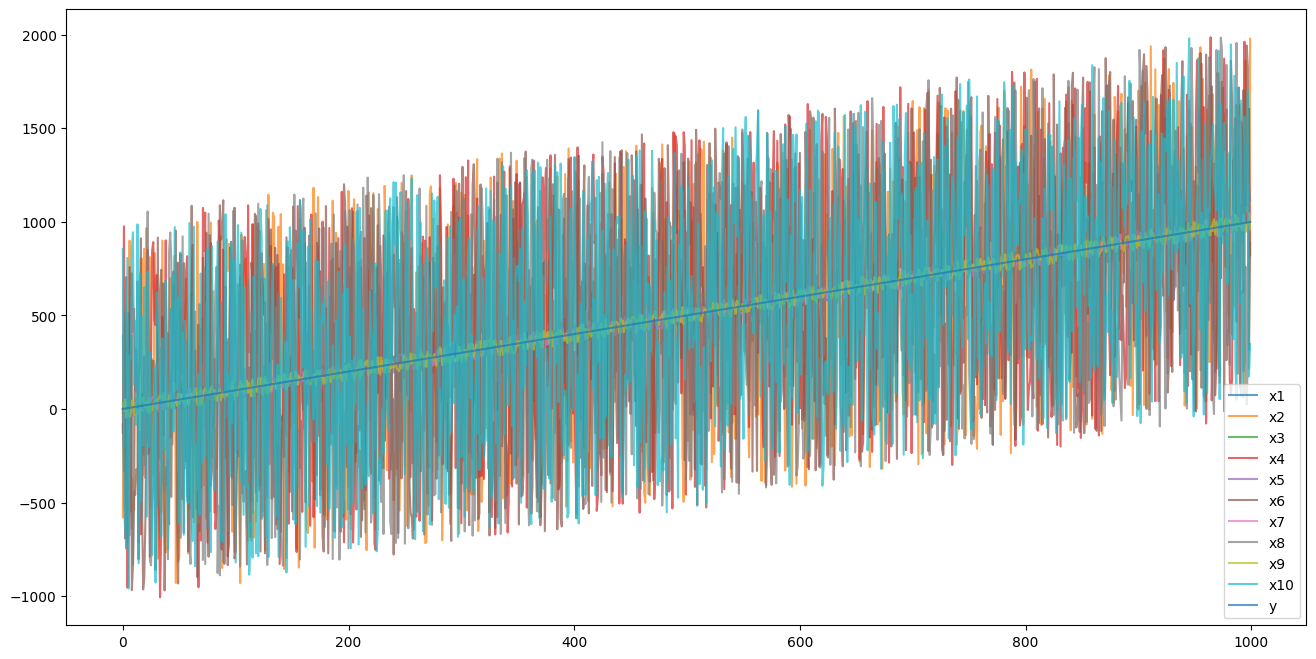

In [13]:
multi_coll_data.plot(figsize=(16, 8), alpha=0.7)

<Axes: >

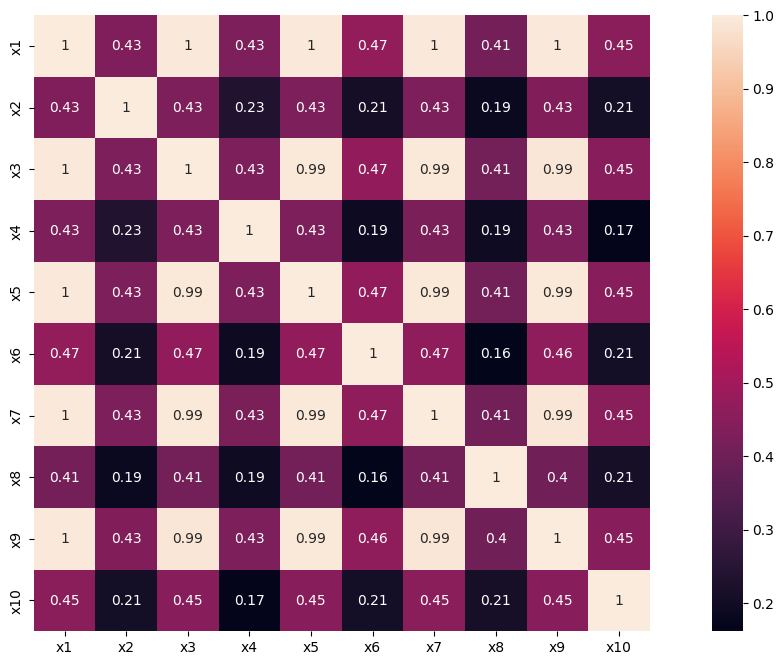

In [14]:
import seaborn as sns

corr = multi_coll_data.drop(columns = ['y']).corr()
plt.figure(figsize=(16, 8))
sns.heatmap(corr, square=True, annot=True)

<Figure size 1600x800 with 0 Axes>

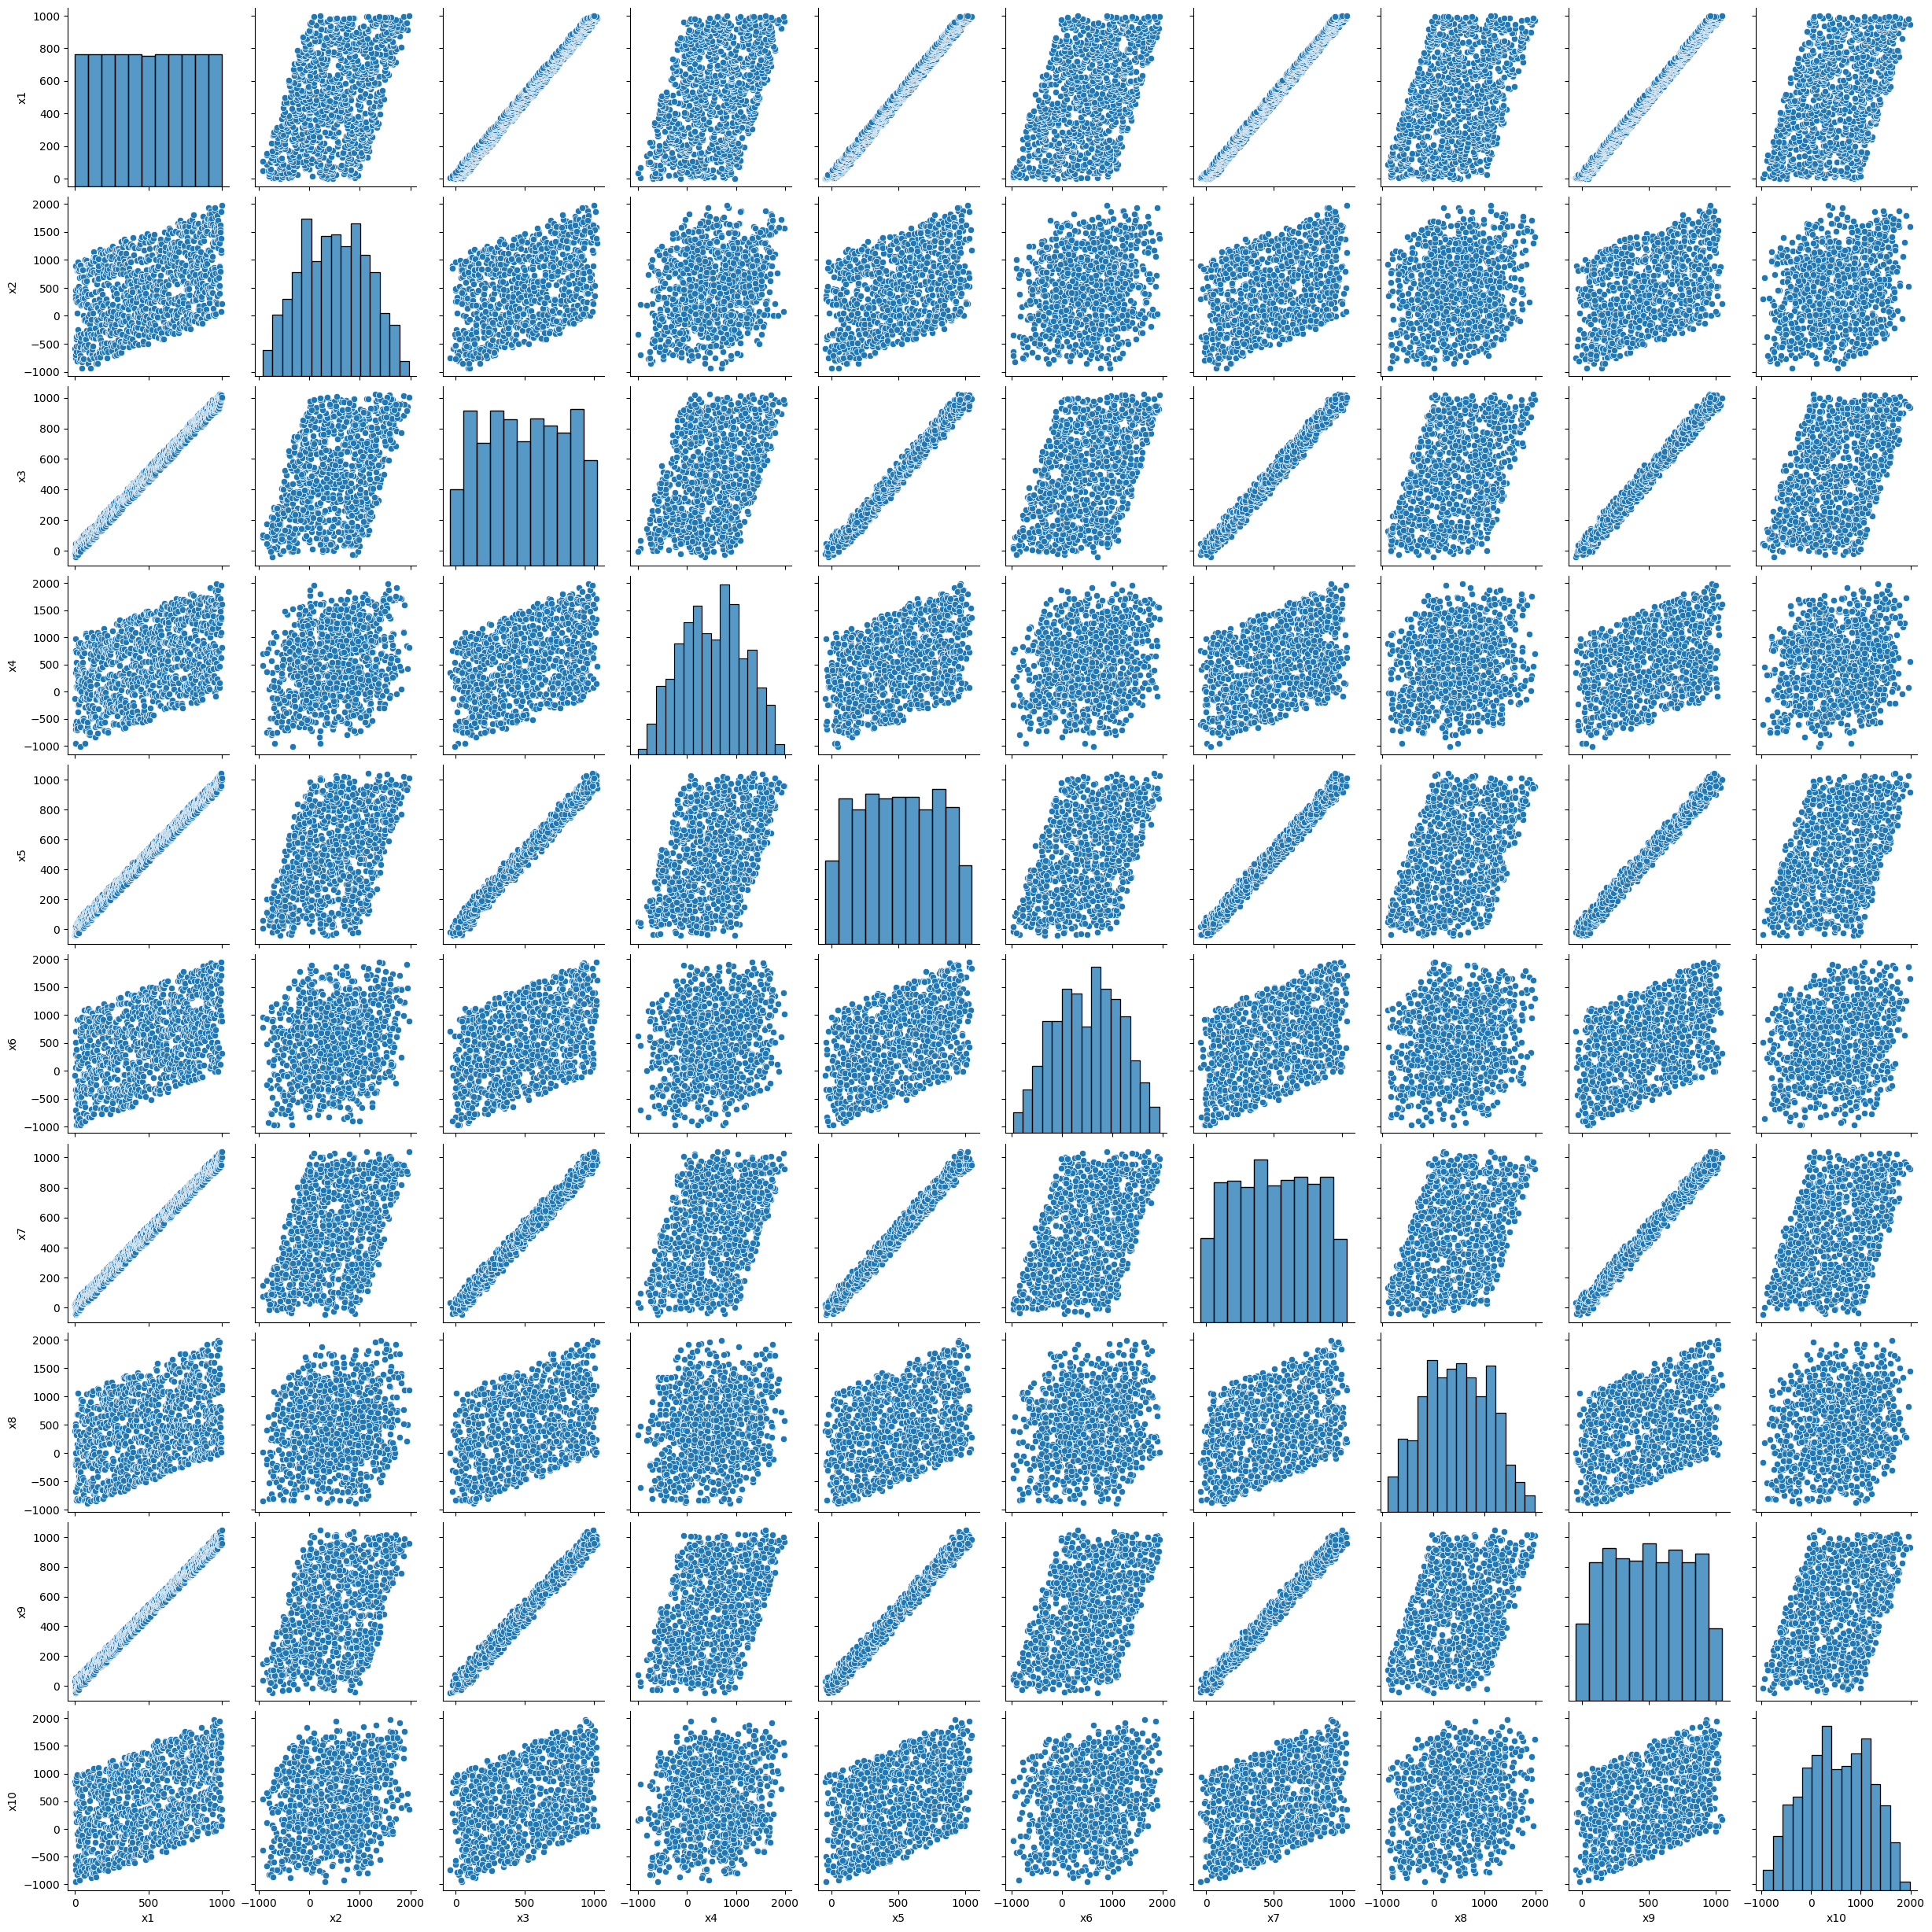

In [15]:
plt.figure(figsize=(16, 8))
sns.pairplot(multi_coll_data.drop(columns = ['y']))


### Изучение зависимых и независимых переменных

In [4]:
df = pd.read_csv('../../data/part3/chapter9/auto-mpg.data.csv')
df

mpg  cyl   disp   hp  weight  accel  my                       name
0    18.0    8  307.0  130    3504   12.0  70  chevrolet chevelle malibu
1    15.0    8  350.0  165    3693   11.5  70          buick skylark 320
2    18.0    8  318.0  150    3436   11.0  70         plymouth satellite
3    16.0    8  304.0  150    3433   12.0  70              amc rebel sst
4    17.0    8  302.0  140    3449   10.5  70                ford torino
..    ...  ...    ...  ...     ...    ...  ..                        ...
387  27.0    4  140.0   86    2790   15.6  82            ford mustang gl
388  44.0    4   97.0   52    2130   24.6  82                  vw pickup
389  32.0    4  135.0   84    2295   11.6  82              dodge rampage
390  28.0    4  120.0   79    2625   18.6  82                ford ranger
391  31.0    4  119.0   82    2720   19.4  82                 chevy s-10

[392 rows x 8 columns]

In [5]:
df.describe()

mpg         cyl        disp          hp       weight  \
count  392.000000  392.000000  392.000000  392.000000   392.000000   
mean    23.445918    5.471939  194.411990  104.469388  2977.584184   
std      7.805007    1.705783  104.644004   38.491160   849.402560   
min      9.000000    3.000000   68.000000   46.000000  1613.000000   
25%     17.000000    4.000000  105.000000   75.000000  2225.250000   
50%     22.750000    4.000000  151.000000   93.500000  2803.500000   
75%     29.000000    8.000000  275.750000  126.000000  3614.750000   
max     46.600000    8.000000  455.000000  230.000000  5140.000000   

            accel          my  
count  392.000000  392.000000  
mean    15.541327   75.979592  
std      2.758864    3.683737  
min      8.000000   70.000000  
25%     13.775000   73.000000  
50%     15.500000   76.000000  
75%     17.025000   79.000000  
max     24.800000   82.000000

In [6]:
train = df.loc[:310]
train

mpg  cyl   disp   hp  weight  accel  my                       name
0    18.0    8  307.0  130    3504   12.0  70  chevrolet chevelle malibu
1    15.0    8  350.0  165    3693   11.5  70          buick skylark 320
2    18.0    8  318.0  150    3436   11.0  70         plymouth satellite
3    16.0    8  304.0  150    3433   12.0  70              amc rebel sst
4    17.0    8  302.0  140    3449   10.5  70                ford torino
..    ...  ...    ...  ...     ...    ...  ..                        ...
306  33.5    4  151.0   90    2556   13.2  79            pontiac phoenix
307  41.5    4   98.0   76    2144   14.7  80                  vw rabbit
308  38.1    4   89.0   60    1968   18.8  80      toyota corolla tercel
309  32.1    4   98.0   70    2120   15.5  80         chevrolet chevette
310  37.2    4   86.0   65    2019   16.4  80                 datsun 310

[311 rows x 8 columns]

In [7]:
valid = df.loc[311:350]
valid.head()

mpg  cyl   disp  hp  weight  accel  my                name
311  28.0    4  151.0  90    2678   16.5  80  chevrolet citation
312  26.4    4  140.0  88    2870   18.1  80       ford fairmont
313  24.3    4  151.0  90    3003   20.1  80         amc concord
314  19.1    6  225.0  90    3381   18.7  80         dodge aspen
315  34.3    4   97.0  78    2188   15.8  80           audi 4000

In [8]:
test = df.loc[350:]
test.head()

mpg  cyl   disp   hp  weight  accel  my                       name
350  33.7    4  107.0   75    2210   14.4  81              honda prelude
351  32.4    4  108.0   75    2350   16.8  81             toyota corolla
352  32.9    4  119.0  100    2615   14.8  81               datsun 200sx
353  31.6    4  120.0   74    2635   18.3  81                  mazda 626
354  28.1    4  141.0   80    3230   20.4  81  peugeot 505s turbo diesel

#### Разделение данных на обучающую, валидационную и тестовую выборку

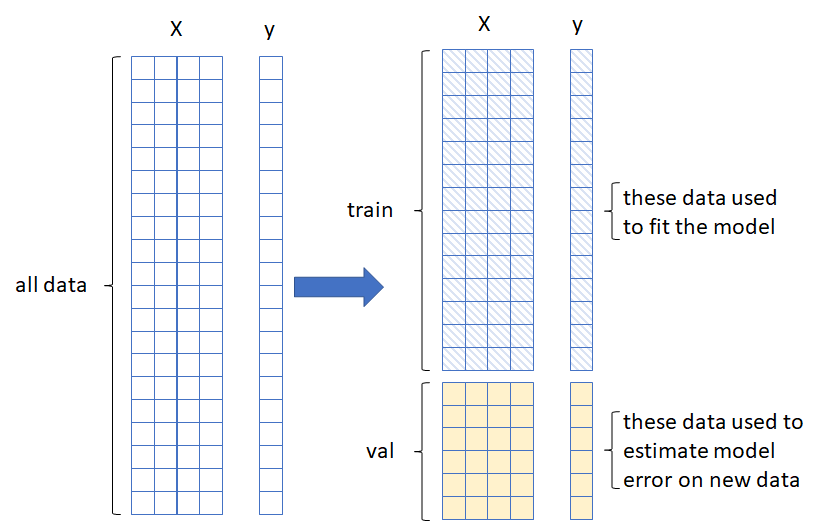

In [9]:
df

mpg  cyl   disp   hp  weight  accel  my                       name
0    18.0    8  307.0  130    3504   12.0  70  chevrolet chevelle malibu
1    15.0    8  350.0  165    3693   11.5  70          buick skylark 320
2    18.0    8  318.0  150    3436   11.0  70         plymouth satellite
3    16.0    8  304.0  150    3433   12.0  70              amc rebel sst
4    17.0    8  302.0  140    3449   10.5  70                ford torino
..    ...  ...    ...  ...     ...    ...  ..                        ...
387  27.0    4  140.0   86    2790   15.6  82            ford mustang gl
388  44.0    4   97.0   52    2130   24.6  82                  vw pickup
389  32.0    4  135.0   84    2295   11.6  82              dodge rampage
390  28.0    4  120.0   79    2625   18.6  82                ford ranger
391  31.0    4  119.0   82    2720   19.4  82                 chevy s-10

[392 rows x 8 columns]

In [10]:
def plot_histogram_grid(df, variables, n_rows, n_cols, bins):
    fig = plt.figure(figsize = (11, 11))
    for i, var_name in enumerate(variables):
        ax = fig.add_subplot(n_rows, n_cols, i + 1)

        if len(np.unique(df[var_name])) <= bins:
          use_bins = len(np.unique(df[var_name]))
        else:
          use_bins = bins

        df[var_name].hist(bins = use_bins, ax = ax)
        ax.set_title(var_name)

    fig.tight_layout()
    plt.show()

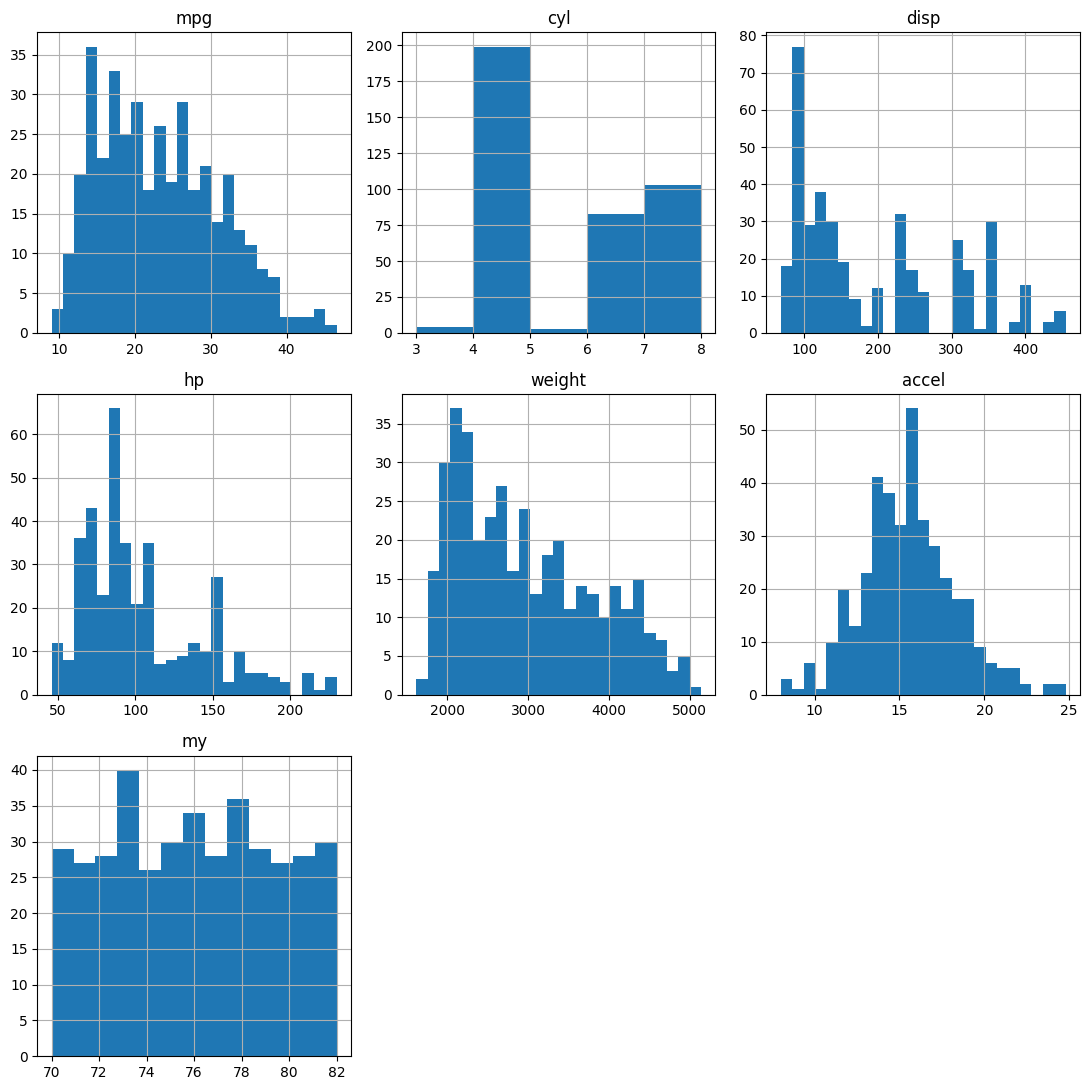

In [11]:
plot_histogram_grid(df, variables=list(df.columns[:-1]), n_rows=3, n_cols=3, bins=25)

In [12]:
def plot_corr_grid(df, variables):
    n_cols = len(variables) - 1
    n_rows = n_cols
    fig = plt.figure(figsize = (18, 16))
    for i in range(n_rows):
        for j in range(i):
            ax = fig.add_subplot(n_rows, n_cols, (i) * n_cols + j + 1) 
            df.plot.scatter(ax = ax, x = variables[i], y = variables[j])
            ax.set_title(variables[i] + ' vs. ' + variables[j])

    fig.tight_layout()
    plt.show()

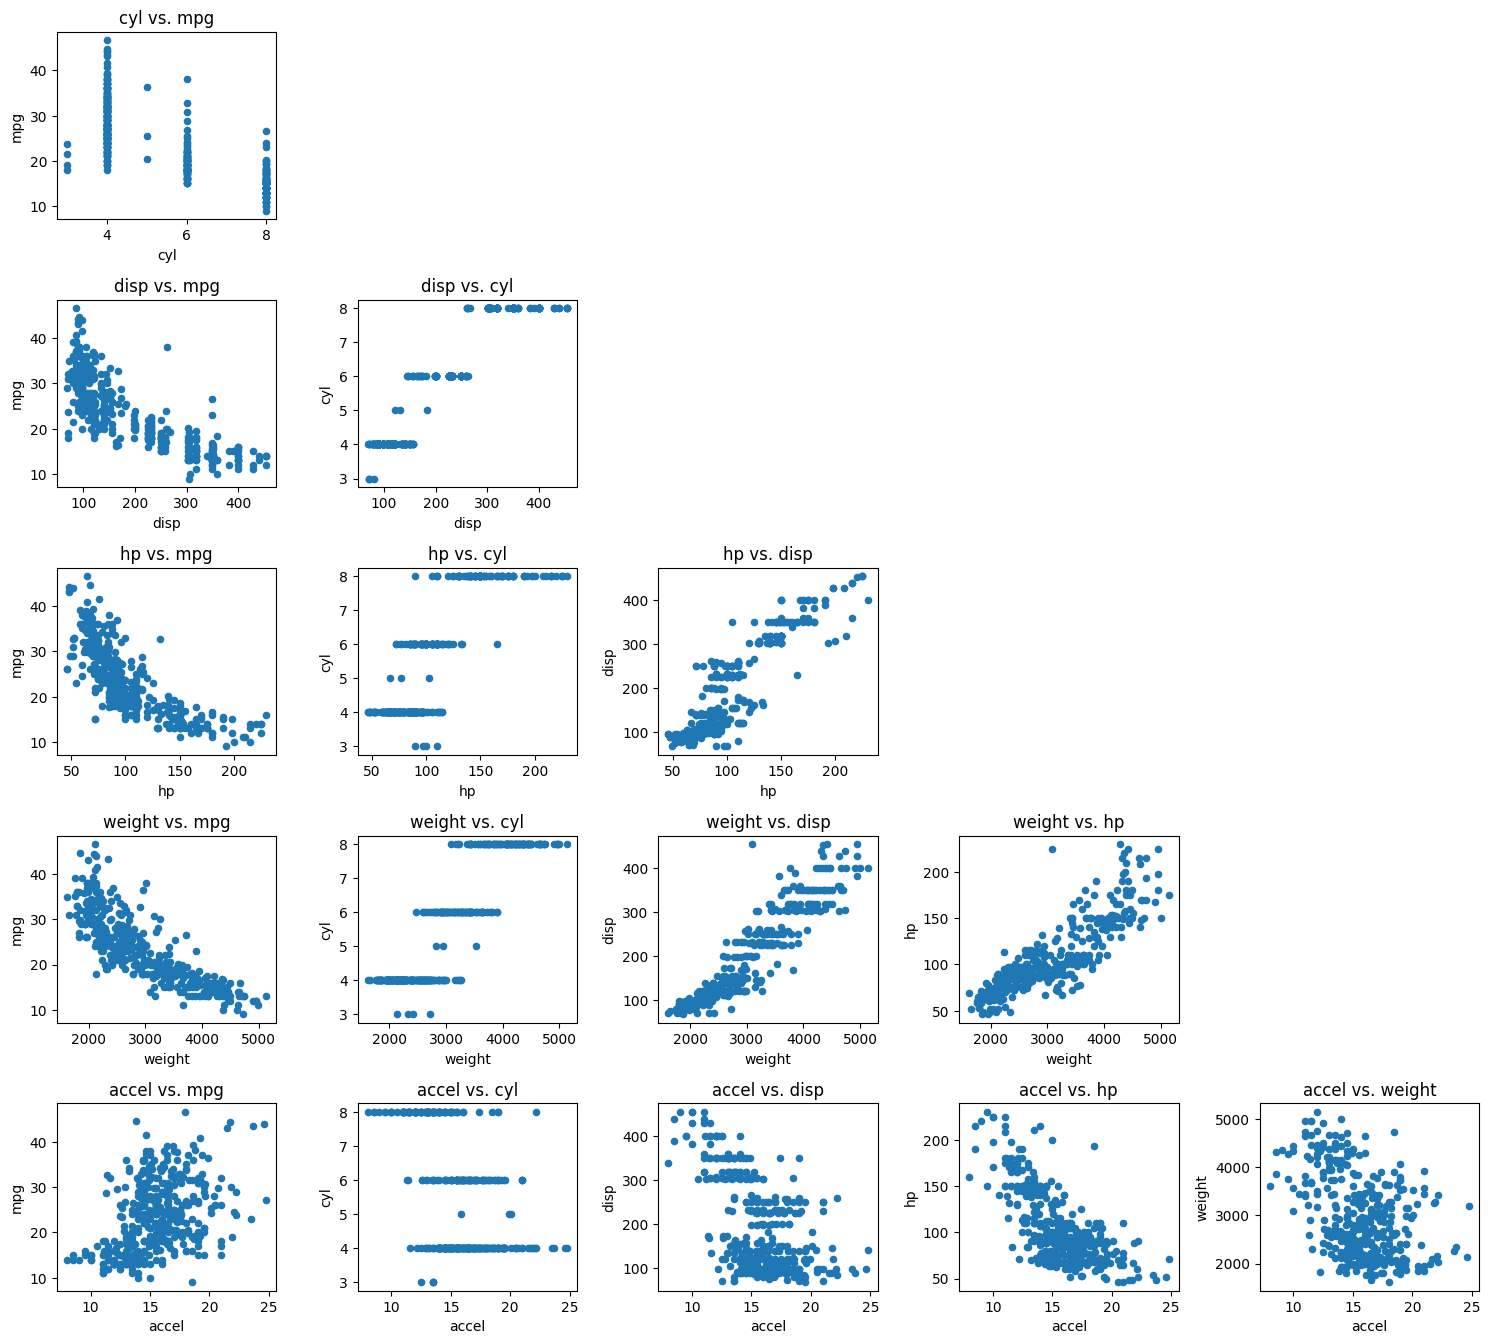

In [13]:
plot_corr_grid(df, variables=list(df.columns[:-1]))

In [14]:
np.random.seed(55)

train_idxs = np.random.choice(df.shape[0], int(0.8*df.shape[0]))
train_idxs[:5]

array([154, 295, 381,  29, 311])

In [15]:
validation_idxs = [i for i in range(df.shape[0]) if i not in train_idxs]
validation_idxs[:5]

[0, 4, 6, 7, 8]

In [16]:
X_train = df.iloc[train_idxs, :].drop(columns=['name', 'mpg'])
Y_train = np.reshape(np.array(df.loc[train_idxs, 'mpg']), (-1, 1))

In [17]:
X_train.head()

cyl   disp   hp  weight  accel  my
154    8  400.0  170    4668   11.5  75
295    5  183.0   77    3530   20.1  79
381    6  262.0   85    3015   17.0  82
29     4   97.0   88    2130   14.5  71
311    4  151.0   90    2678   16.5  80

In [18]:
Y_train[:5]

array([[16. ],
       [25.4],
       [38. ],
       [27. ],
       [28. ]])

In [19]:
lin_model = OLS()

car_model = lin_model.fit(X_train, Y_train)

In [20]:
print('R2', car_model.score(X_train, Y_train))
print('model coefficients', car_model.coef_)
print('intercept', car_model.intercept_)

R2 0.8238605399666834
model coefficients [[-0.58077537  0.0090782   0.02015659 -0.00736672  0.02377262  0.8024231 ]]
intercept [-16.35398564]


In [36]:
MSE = mse(Y_train, car_model.predict(X_train))  #, squared=False)
RMSE = MSE ** 0.5
RMSE

3.1914482901753436

In [36]:
predict = car_model.predict(X_train)
predict[:5]

array([[12.12498469],
       [21.82024205],
       [28.24533153],
       [25.60290991],
       [29.36583698]])

<Axes: >

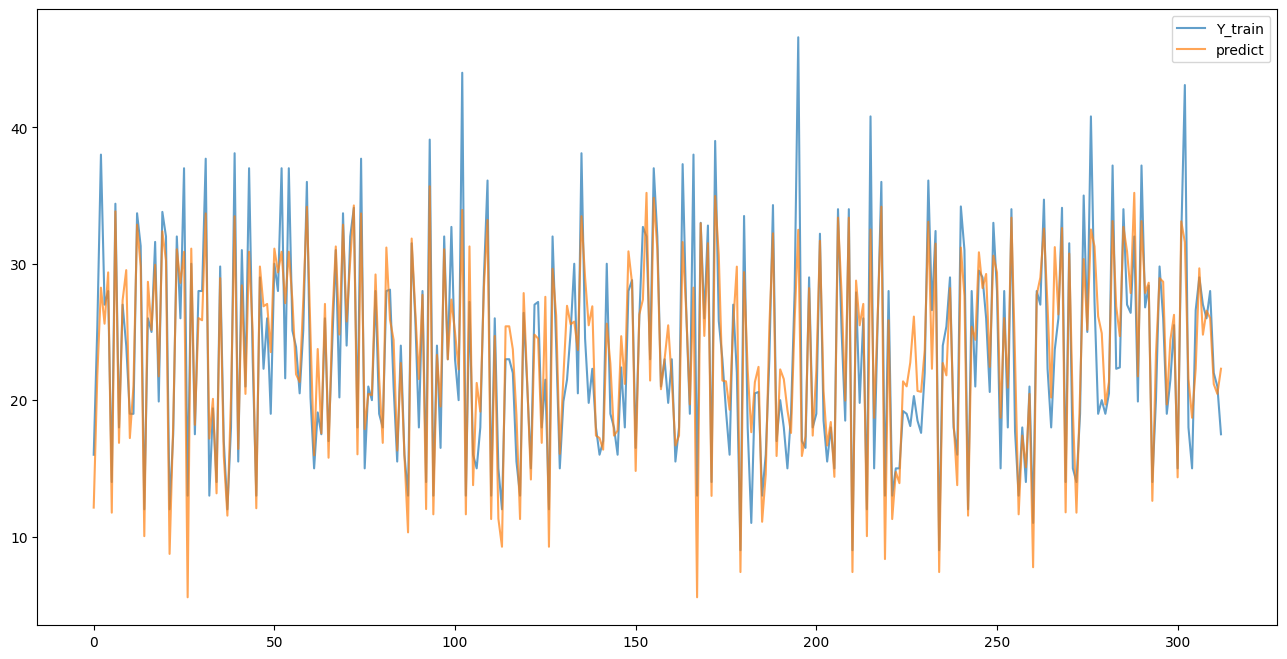

In [52]:

result = pd.concat([pd.DataFrame(Y_train, columns=['Y_train']), pd.DataFrame(predict, columns=['predict'])], axis=1)
result.plot(figsize=(16, 8), alpha=0.7)

#### Задание 3.001

1. Вывести график зависимости правильных ответов Y от предсказанных ответов predict для обученной модели на основе датасета автомобилей (data/part3/chapter9/auto-mpg.data.csv).

2. Посчитать и вывести степень корреляции между правильными ответами Y и предсказанными ответами predict

3. Используя метод предсказания модели, вывести расход топлива (дальность) mpg для трёх новых автомобилей, которых не было ранее в датасете. Параметры автомобилей можно выдумать самостоятельно или найти в интернете.

#### Оценка модели на валидационной выборке

In [31]:
X_valid = df.iloc[validation_idxs, :].drop(columns=['name', 'mpg'])
Y_valid = np.reshape(np.array(df.loc[validation_idxs, 'mpg']), (-1, 1))

In [32]:
X_valid.head()

cyl   disp   hp  weight  accel  my
0    8  307.0  130    3504   12.0  70
4    8  302.0  140    3449   10.5  70
6    8  454.0  220    4354    9.0  70
7    8  440.0  215    4312    8.5  70
8    8  455.0  225    4425   10.0  70

In [34]:
Y_valid[:5]

array([[18.],
       [17.],
       [14.],
       [14.],
       [14.]])

In [37]:
MSE = mse(Y_valid, car_model.predict(X_valid))  #, squared=False)
RMSE = MSE ** 0.5
RMSE

3.637599650177239

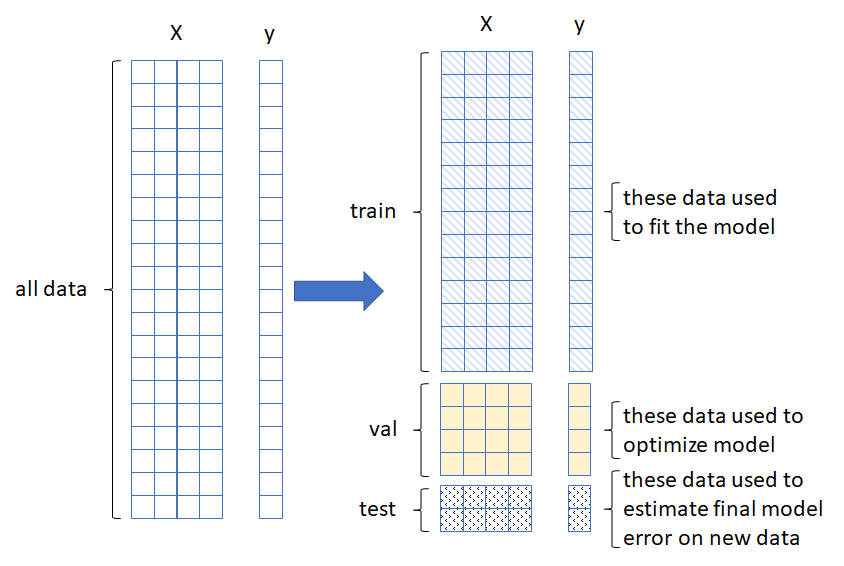

#### Задание 3.002

***Сведения о датасете Iris***

Набор данных Iris использовался в классической статье Р. А. Фишера 1936 года «Использование множественных измерений в таксономических проблемах».

Он включает три вида ирисов с 50 образцами каждый, а также некоторые свойства каждого цветка. Один вид цветка линейно отделим от двух других, но два других не отделимы линейно друг от друга.

Столбцы в этом наборе данных:
- Id
- Длина чашелистика, см
- Ширина чашелистика, см
- Длина лепестка, см
- Ширина лепестка, см
- Вид

***Задание***

1. Загрузите датасет который встроен в библиотеку sklearn следующим образом:
```python
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df
```
---
2. Постройте графики пар зависимостей переменных дру от друга с помощью matplotlib и seaborn.pairplot следующим образом:
```python
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(data, hue='species')
plt.show()

Необязательно: выведите дополнительную визуализацию для лучшего понимания данных.
```
---
3. Разделите датасет на две части: обучающую и тестовую выборку с помощью метода train_test_split библиотеки sklearn.model_selection. 

Пример:
```python
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=555)
```
---
4. Создайте линейно-ререссионную модель для предсказания вида Ириса по длине и ширине чашелистика и лепестка
---
5. Оцените точность полученной модели с помощью различных метрик.
---
6. Создайте набор данных для трёх разных цветков Ириса чтобы они точно попадали в три разные виды Ириса, при этом не используйте модель. После чего с помощью модели проверьте насколько точно она предсказывает вид каждого из этих трёх цветков.

#### Пример создания обучающей, валидационной и тестовой выборки

In [3]:
df = pd.read_csv('../../data/part3/chapter9/austin_weather.csv')

<details>
  <summary>Расшифровка столбцов датасета `austin_weather.csv`...</summary>

1. **Date**  
   Дата записи данных (например, `YYYY-MM-DD`).

2. **TempHighF**  
   Максимальная дневная температура в градусах Фаренгейта (°F).

3. **TempAvgF**  
   Средняя дневная температура (°F).

4. **TempLowF**  
   Минимальная дневная температура (°F).

5. **DewPointHighF**, **DewPointAvgF**, **DewPointLowF**  
   Максимальная, средняя и минимальная **точка росы** за день (°F).  
   *Точка росы* — температура, при которой воздух насыщается водяным паром.

6. **HumidityHighPercent**, **HumidityAvgPercent**, **HumidityLowPercent**  
   Максимальная, средняя и минимальная **относительная влажность** за день (%).

7. **SeaLevelPressureHighInches**, **SeaLevelPressureAvgInches**, **SeaLevelPressureLowInches**  
   Максимальное, среднее и минимальное **атмосферное давление** на уровне моря (в дюймах ртутного столба, inHg).

8. **VisibilityHighMiles**, **VisibilityAvgMiles**, **VisibilityLowMiles**  
   Максимальная, средняя и минимальная **видимость** за день (в милях).

9. **WindHighMPH**  
   Максимальная скорость ветра за день (миль/час).

10. **WindAvgMPH**  
    Средняя скорость ветра за день (миль/час).

11. **WindGustMPH**  
    Максимальная скорость **порывов ветра** за день (миль/час).

12. **PrecipitationSumInches**  
    Сумма осадков за день (в дюймах).  
    *Например:* `0` — отсутствие дождя, `0.5` — полдюйма осадков.

13. **Events**  
    Погодные явления, зафиксированные за день. Могут включать:  
    `Rain`, `Thunderstorm`, `Snow`, `Fog` и т.д.  
    *Если явлений несколько, они перечисляются через запятую.*  
    *Пример:* `Rain, Thunderstorm`.

***Примечания***
- Данные представлены в единицах измерения, принятых в США (Фаренгейты, дюймы, мили).
- Давление (`SeaLevelPressure...`) измеряется в дюймах ртутного столба (inHg), а не в гектопаскалях (hPa).
- Для преобразования единиц в метрическую систему потребуются дополнительные вычисления.

</details>

In [5]:
df.columns

Index(['Date', 'TempHighF', 'TempAvgF', 'TempLowF', 'DewPointHighF',
       'DewPointAvgF', 'DewPointLowF', 'HumidityHighPercent',
       'HumidityAvgPercent', 'HumidityLowPercent',
       'SeaLevelPressureHighInches', 'SeaLevelPressureAvgInches',
       'SeaLevelPressureLowInches', 'VisibilityHighMiles',
       'VisibilityAvgMiles', 'VisibilityLowMiles', 'WindHighMPH', 'WindAvgMPH',
       'WindGustMPH', 'PrecipitationSumInches', 'Events'],
      dtype='object')

### Понимание масштабирования и нормализации данных

### Задание 9.1 - Разбиение, масштабирование и моделирование данных

### Резюме

## 10 Моделирование данных - основы моделирования

### Введение в моделирование данных

### Изучение основ моделирования

### Прогнозирование будущих значений временных рядов

### Задание 10.1 - Нормализация и сглаживание данных

### Резюме

## 11 Моделирование данных - Регрессионное моделирование

### Введение в регрессионное моделирование

### Изучение регрессионного моделирования

### Диагностика модели

### Задание 11.1 - Множественная регрессия с нелинейными моделями

### Резюме